# **Sales Prediction Using Python**
By: Vignesh Naik
As part of Data Science Internship at CodSoft.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [3]:
import gradio as gr

In [4]:
data = pd.read_csv('advertising.csv')

In [5]:
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [6]:
X = data[['TV', 'Radio', 'Newspaper']]
Y = data['Sales']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

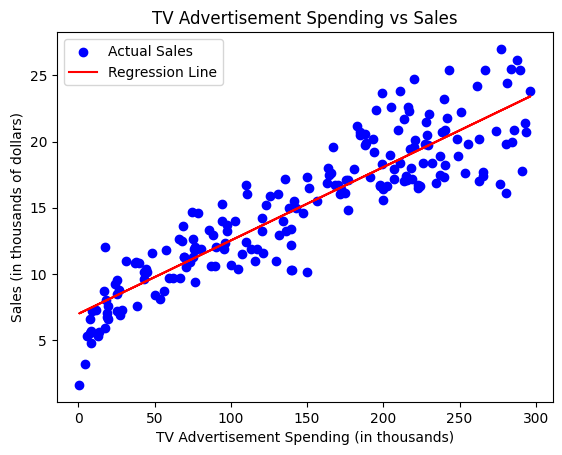

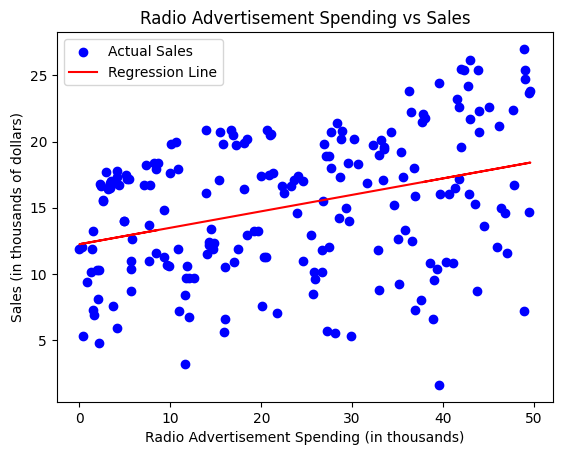

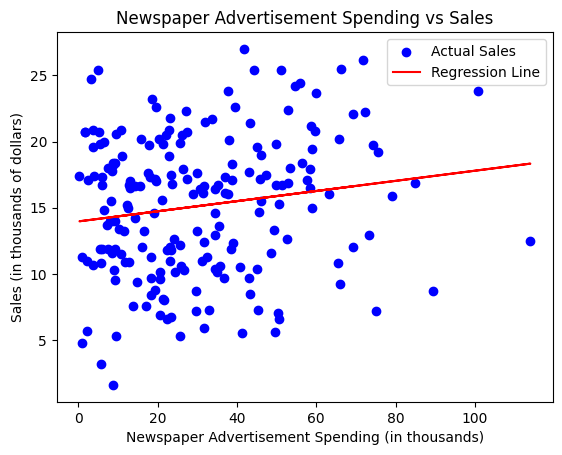

In [9]:
def plot_TV_Sales_regression_line():
    X_tv = data[['TV']]
    model_tv = LinearRegression()
    model_tv.fit(X_tv, Y)

    predictions = model_tv.predict(X_tv)

    plt.scatter(data['TV'], Y, color='blue', label="Actual Sales")

    plt.plot(data['TV'], predictions, color='red', label="Regression Line")

    plt.xlabel("TV Advertisement Spending (in thousands)")
    plt.ylabel("Sales (in thousands of dollars)")
    plt.title("TV Advertisement Spending vs Sales")
    plt.legend()
    plt.show()

plot_TV_Sales_regression_line()

def plot_Radio_Sales_regression_line():
    X_radio = data[['Radio']]
    model_radio = LinearRegression()
    model_radio.fit(X_radio, Y)

    predictions = model_radio.predict(X_radio)

    plt.scatter(data['Radio'], Y, color='blue', label="Actual Sales")

    plt.plot(data['Radio'], predictions, color='red', label="Regression Line")

    plt.xlabel("Radio Advertisement Spending (in thousands)")
    plt.ylabel("Sales (in thousands of dollars)")
    plt.title("Radio Advertisement Spending vs Sales")
    plt.legend()
    plt.show()

plot_Radio_Sales_regression_line()

def plot_Newspaper_Sales_regression_line():
    X_newspaper = data[['Newspaper']]
    model_newspaper = LinearRegression()
    model_newspaper.fit(X_newspaper, Y)

    predictions = model_newspaper.predict(X_newspaper)

    plt.scatter(data['Newspaper'], Y, color='blue', label="Actual Sales")

    plt.plot(data['Newspaper'], predictions, color='red', label="Regression Line")

    plt.xlabel("Newspaper Advertisement Spending (in thousands)")
    plt.ylabel("Sales (in thousands of dollars)")
    plt.title("Newspaper Advertisement Spending vs Sales")
    plt.legend()
    plt.show()

plot_Newspaper_Sales_regression_line()

In [10]:
def predict_sales(tv, radio, newspaper):
    input_data = [[tv, radio, newspaper]]
    prediction = model.predict(input_data)[0]
    return f"Predicted Sales: {round(prediction, 2)} thousand dollars."

In [11]:
interface = gr.Interface(
    fn=predict_sales,
    inputs=[
        gr.Slider(0, 300, label="TV Advertisement Spending (in thousands)"),
        gr.Slider(0, 50, label="Radio Advertisement Spending (in thousands)"),
        gr.Slider(0, 50, label="Newspaper Advertisement Spending (in thousands)")
    ],
    outputs="text",
    title="Sales Prediction Using Python",
    description="Input the advertisement spendings on TV, Radio, and Newspaper to get a predicted sales value.",
)

In [12]:
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3d85b2825c63a3b46a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
